In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

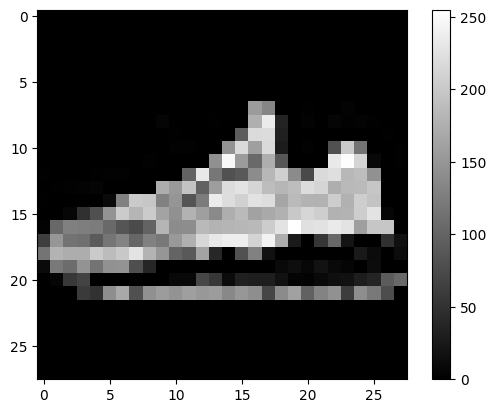

7

In [3]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()
valid_labels[data_idx]

In [4]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 0.7475 - loss: 16.4586 - val_accuracy: 0.7824 - val_loss: 13.4018
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7847 - loss: 12.2622 - val_accuracy: 0.7682 - val_loss: 12.4295
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7969 - loss: 11.0939 - val_accuracy: 0.7814 - val_loss: 14.1676
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.7987 - loss: 10.7561 - val_accuracy: 0.7898 - val_loss: 11.3019
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.8019 - loss: 10.6947 - val_accuracy: 0.7881 - val_loss: 11.3455


In [14]:
model.predict(train_images[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[-1.92563965e+02, -5.51928528e+02, -1.57045273e+02,
        -2.00151138e+02, -2.39645828e+02,  3.98879456e+02,
         2.96040039e+01,  4.22610931e+02,  2.56502563e+02,
         5.20324951e+02],
       [ 4.91461761e+02, -1.90016891e+02,  2.28184586e+02,
         1.89035248e+02, -6.38479347e+01, -1.06714062e+03,
         2.99317108e+02, -2.03337903e+03, -6.96900711e+01,
        -8.46579529e+02],
       [ 1.46764725e+02,  5.49950294e+01,  7.99128494e+01,
         1.17940285e+02,  8.79385681e+01, -3.81524048e+02,
         1.00951416e+02, -5.61493774e+02, -1.85684371e+00,
        -2.88221771e+02],
       [ 2.26111801e+02,  7.30220566e+01,  1.97165131e+02,
         2.49170792e+02,  8.02991104e+01, -6.22752441e+02,
         2.11518066e+02, -1.13764600e+03, -5.53230247e+01,
        -6.64125610e+02],
       [ 3.26721527e+02,  2.48030380e+02,  1.77975235e+02,
         3.10208405e+02,  2.33434174e+02, -7.04833740e+02,
         2.34024704e+02, -7.25752197e+02,  1.13275124e+02,
        -7.

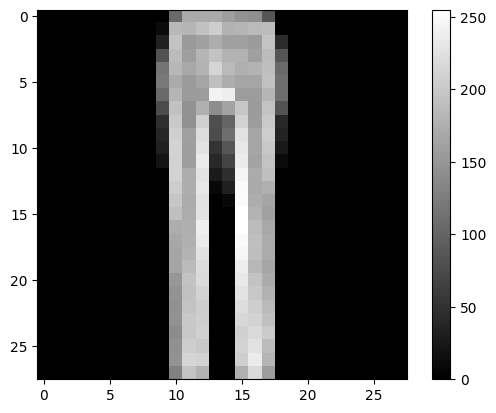

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=uint8)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

<Figure size 640x480 with 0 Axes>

In [ ]:
data_idx = 69 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])